# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

"The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts."

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [24]:
import pandas as pd

In [26]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [28]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [30]:
df.shape

(41188, 21)

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```

In [122]:
# Check data types and missing values
missing_values = df.isnull().sum()
missing_values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### Analysis

There are no null values in the dataset, though there are "unknown" values, which could be considered missing values.  Let's count how many unknowns there are.

Note: as pointed out in the description, we should not include 'duration' in our predictive models as it is not known before a call is performed.

In [125]:
# List of columns to check
unknown_cols = ["job", "marital", "education", "default", "housing", "loan"]

# Initialize a dictionary to store counts for each column
unknown_counts = {}

# Loop through each column
for col in unknown_cols:
  # Count the number of "unknown" values in the column
  unknown_counts[col] = (df[col] == "unknown").sum()

# Print the results
print("Number of 'unknown' values in each column:")
for col, count in unknown_counts.items():
  print(f"{col}: {count}")

print("\nPercent of 'unknown' values in each column:")
for col, count in unknown_counts.items():
  print(f"{col}: {round(100*count/len(df), 2)}%")

Number of 'unknown' values in each column:
job: 330
marital: 80
education: 1731
default: 8597
housing: 990
loan: 990

Percent of 'unknown' values in each column:
job: 0.8%
marital: 0.19%
education: 4.2%
default: 20.87%
housing: 2.4%
loan: 2.4%


#### Plots of the Distribution of Term Deposit Subscription by Feature

In [251]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

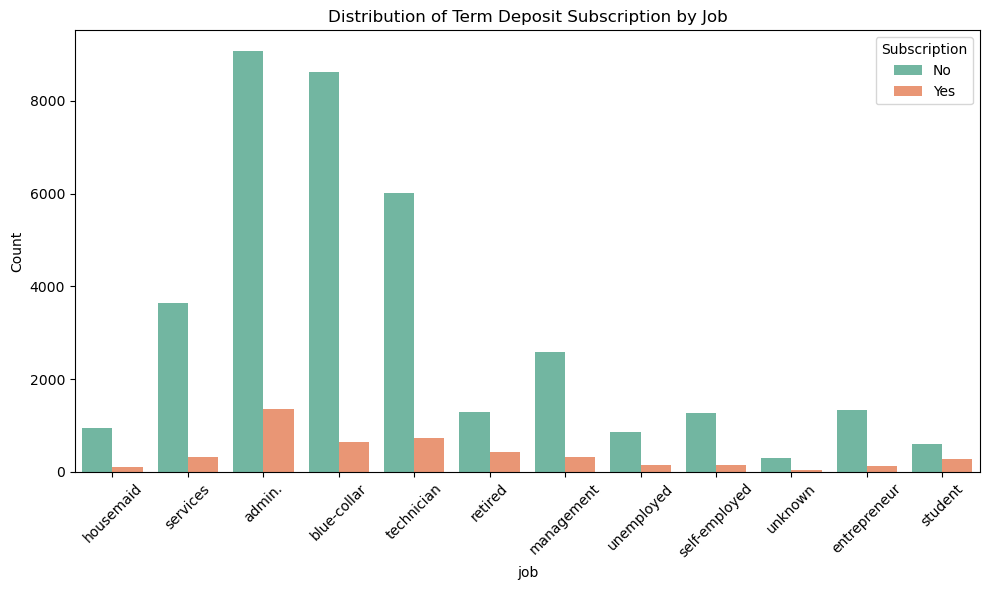

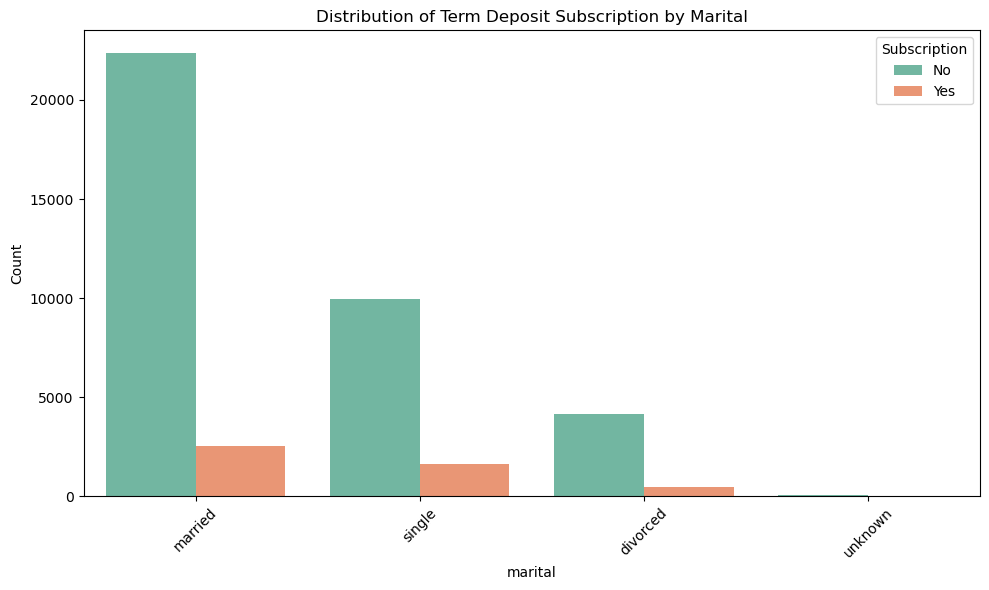

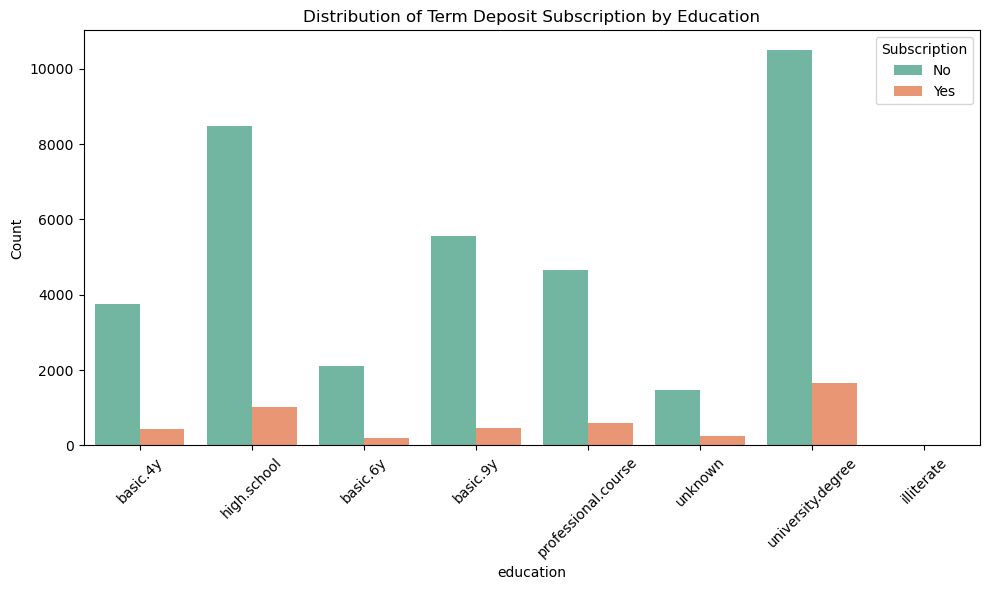

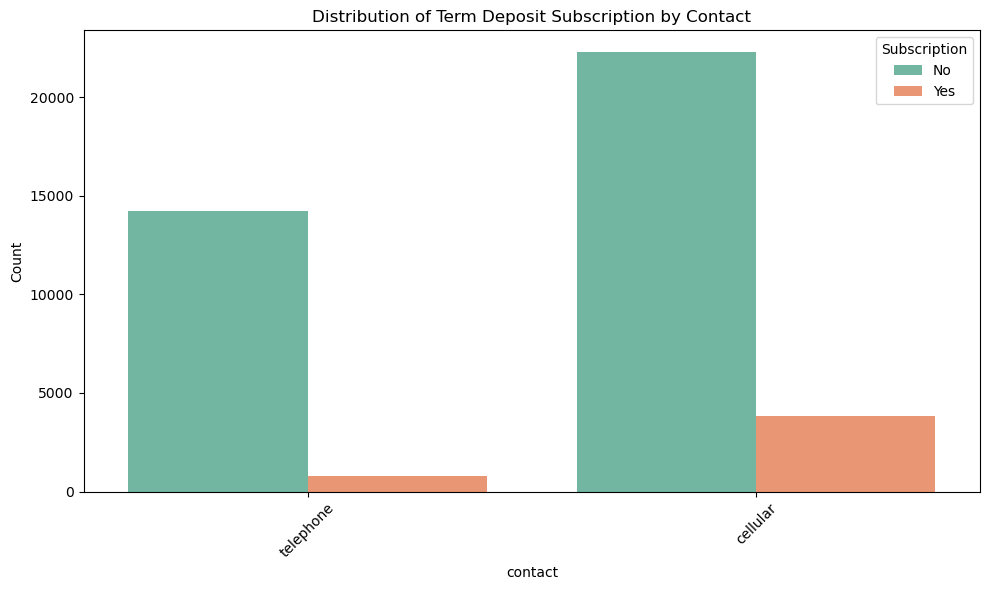

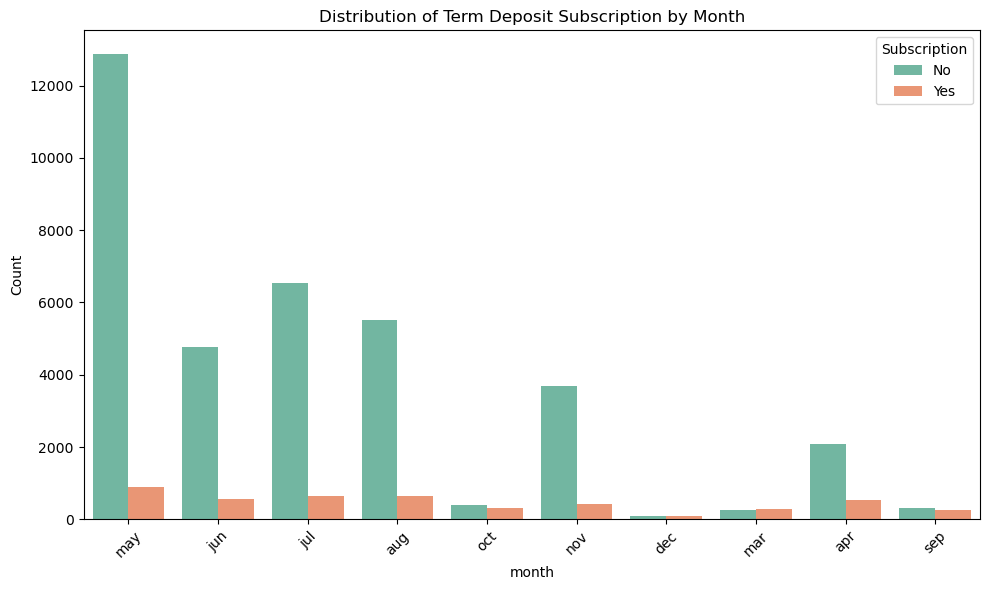

In [253]:
categorical_features = ['job', 'marital', 'education', 'contact', 'month']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature, hue='y', palette='Set2')
    plt.title(f'Distribution of Term Deposit Subscription by {feature.capitalize()}')
    plt.ylabel('Count')
    plt.legend(title='Subscription', labels=['No', 'Yes'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    # Save the plot
    plt.savefig(f'plots/subscription_distribution_{feature}.png')
    plt.show()


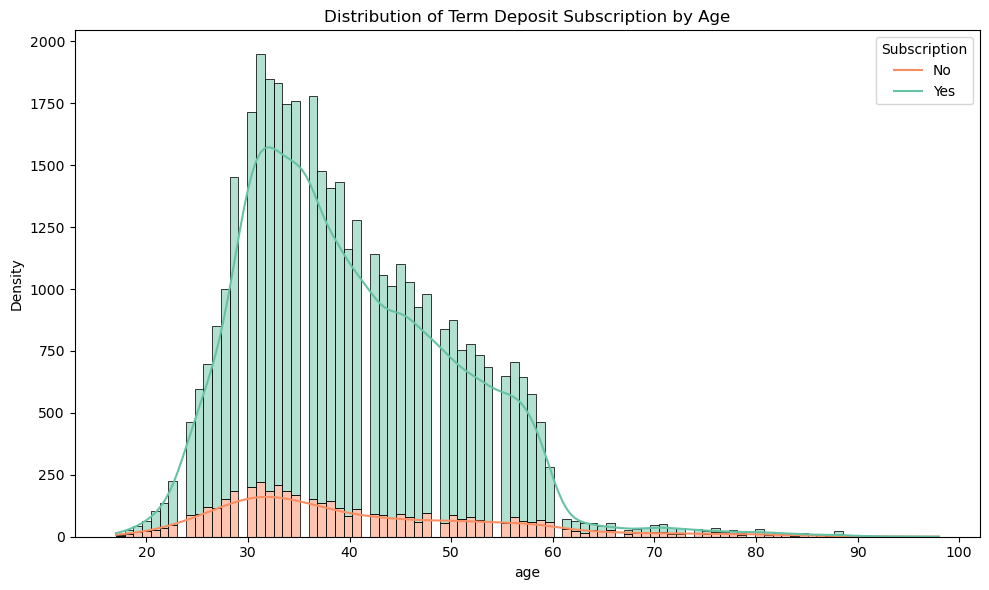

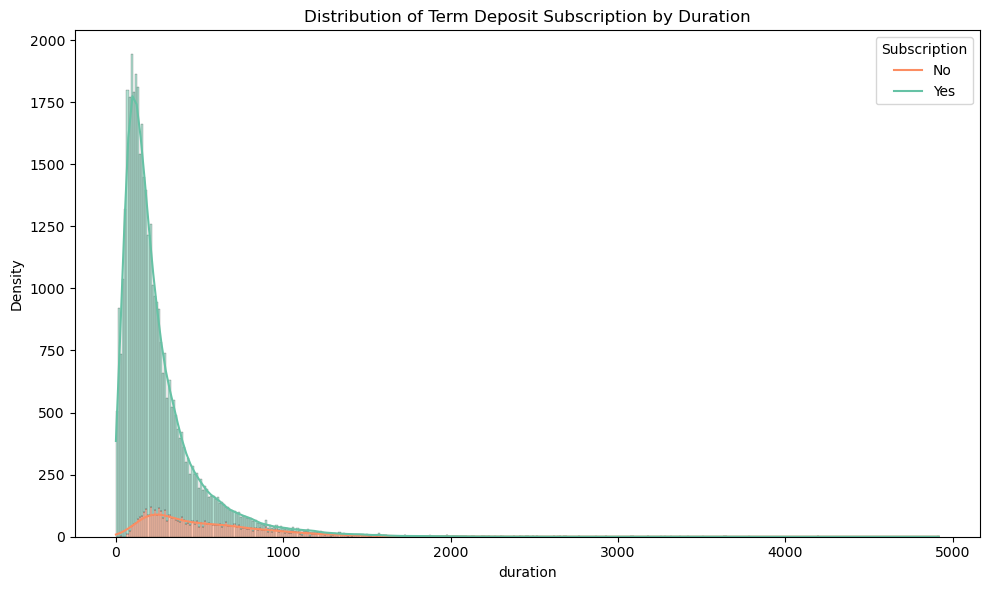

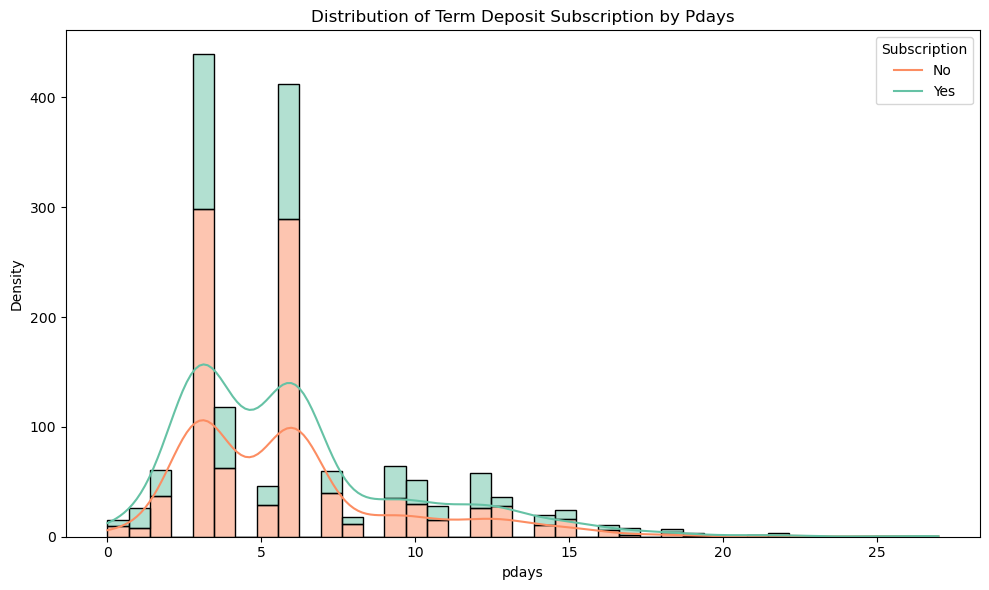

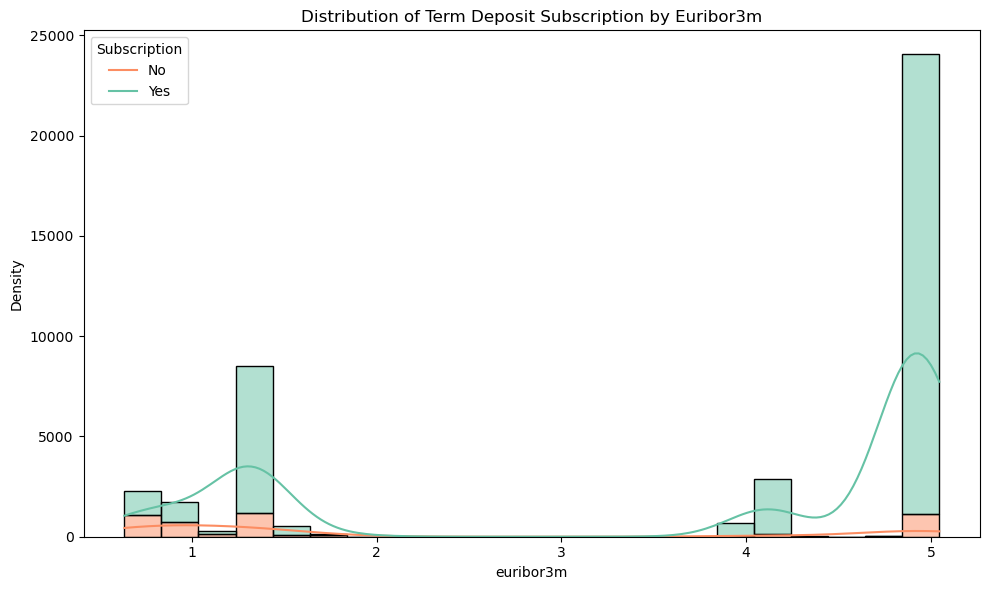

In [258]:
numerical_features = ['age', 'duration', 'pdays', 'euribor3m']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, hue='subscription', multiple='stack', palette='Set2', kde=True)
    plt.title(f'Distribution of Term Deposit Subscription by {feature.capitalize()}')
    plt.ylabel('Density')
    plt.legend(title='Subscription', labels=['No', 'Yes'])
    plt.tight_layout()
    # Save the plot
    plt.savefig(f'plots/subscription_distribution_{feature}.png')
    plt.show()

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### Business Objective

To build a predictive model that can identify potential bank clients who are more likely to subscribe to a term deposit based on their characteristics and past interactions with the bank. Also, we may factor in social and economic context attributes.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [133]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select bank information features and target variable
bank_features = ["age", "job", "marital", "education", "default", "housing", "loan"]
target_variable = "y"

# Encode categorical features using one-hot encoding
encoded_data = pd.get_dummies(df[bank_features])

# Scale the age column
scaler = StandardScaler()
encoded_data["age"] = scaler.fit_transform(encoded_data[["age"]])

# Encode target variable (y) as numerical
target_encoded = {"yes": 1, "no": 0}
reverse_target_encoded = {value: key for key, value in target_encoded.items()}
encoded_data[target_variable] = df[target_variable].map(target_encoded)

print("Encoded bank features:\n", encoded_data.head())
print("\nEncoded target variable:\n", encoded_data["y"].head())

Encoded bank features:
         age  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0  1.533034       False            False             False           True   
1  1.628993       False            False             False          False   
2 -0.290186       False            False             False          False   
3 -0.002309        True            False             False          False   
4  1.533034       False            False             False          False   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0           False        False              False         False        False   
1           False        False              False          True        False   
2           False        False              False          True        False   
3           False        False              False         False        False   
4           False        False              False          True        False   

   ...  default_no  default_unkn

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [138]:
from sklearn.model_selection import train_test_split

# Split data into features (X) and target variable (y)
X = encoded_data.drop('y', axis=1)  # Features
y = encoded_data['y']  # Target variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32950, 34) (8238, 34) (32950,) (8238,)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [142]:
# Calculate class frequencies
train_class_counts = y_train.value_counts()
test_class_counts = y_test.value_counts()

# Get the majority class in the training data
majority_class = train_class_counts.idxmax()

# Calculate baseline accuracy (percentage of instances in the majority class)
baseline_train_accuracy = (train_class_counts[majority_class] / len(y_train)) * 100
baseline_test_accuracy = (test_class_counts[majority_class] / len(y_test)) * 100

# Print the results
print(f"Baseline performance: {baseline_train_accuracy:.2f}%")
print(f"Baseline test data performance: {baseline_test_accuracy:.2f}%")
print(f"Majority class: {reverse_target_encoded[majority_class]}")

Baseline performance: 88.76%
Baseline test data performance: 88.65%
Majority class: no


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

y_pred

array([0, 0, 0, ..., 0, 0, 0])

### Problem 9: Score the Model

What is the accuracy of your model?

In [149]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=0.0)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8865015780529255
Confusion Matrix:
 [[7303    0]
 [ 935    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      7303
           1       0.00      0.00      0.00       935

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.83      8238



### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [152]:
import pandas as pd
import numpy as np
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC()
}

model_results = []

for model_name, model in models.items():
  start_time = time()
  model.fit(X_train, y_train)
  end_time = time()
  train_time = end_time - start_time
  
  y_train_pred = model.predict(X_train)
  train_accuracy = accuracy_score(y_train, y_train_pred)
  
  y_test_pred = model.predict(X_test)
  test_accuracy = accuracy_score(y_test, y_test_pred)
  
  model_results.append({'Model': model_name,
                        'Train Time': train_time,
                        'Train Accuracy': train_accuracy,
                        'Test Accuracy': test_accuracy})

model_results = pd.DataFrame(model_results)

model_results

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.076391,0.887557,0.886502
1,KNN,0.004819,0.889712,0.873877
2,Decision Tree,0.071658,0.916601,0.861131
3,SVM,27.116919,0.888225,0.886744


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

#### More feature engineering and exploration

In [161]:
# Including additional features
additional_features = [
    'contact', 'month', 'day_of_week',
    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
    'euribor3m', 'nr.employed', 'pdays', 'was_contacted_before'
]

# Feature engineering: Add binary feature
df['was_contacted_before'] = (df['pdays'] != 999).astype(int)

# Replace 999 with NaN
df['pdays'] = df['pdays'].replace(999, np.nan)

# Updated list of features
all_features = bank_features + additional_features

# Extracting the updated features and target
X_all = df[all_features]
y_all = df[target_variable]

# Encoding the target variable
y_all = y_all.map({'yes': 1, 'no': 0})

print("Done")

Done


#### Train / Test Split

In [164]:
# Splitting the data into training and testing sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.3, random_state=42)

#### Build a Pipeline

In [175]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Defining the preprocessing steps for the updated features
numeric_features = ['pdays', 'age', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = ['was_contacted_before', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combining the transformers into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Done")

Done


In [177]:
# Applying the transformations
X_train_all_transformed = preprocessor.fit_transform(X_train_all)
X_test_all_transformed = preprocessor.transform(X_test_all)
print("Done")

Done


In [191]:
import warnings
warnings.filterwarnings("ignore", message=".*A worker stopped while some jobs were given to the executor.*")

# Hyperparameter tuning using GridSearchCV
def tune_model(clf, param_grid, X_train, y_train):
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

# Defining parameter grids for each model
param_grids = {
    'KNN': {'n_neighbors': [3, 5, 7, 9, 11]},
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10, 100]},
    'Decision Tree': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 10, 20]},
    'SVM': {'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

# Initialize classifiers with default settings
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC()
}

# Tune each model
best_models = {}
for name, clf in classifiers.items():
    best_models[name] = tune_model(clf, param_grids[name], X_train_all_transformed, y_train_all)

best_models

{'KNN': KNeighborsClassifier(n_neighbors=11),
 'Logistic Regression': LogisticRegression(C=0.01, max_iter=1000),
 'Decision Tree': DecisionTreeClassifier(max_depth=10, min_samples_split=20),
 'SVM': SVC(C=1)}

In [243]:
import time
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, classification_report

# Function to train, evaluate classifiers, and record train time
def evaluate_classifiers_with_time(classifiers, X_train, y_train, X_test, y_test):
    results = []
    confusion_matrices = {}
    classification_reports = {}
    for name, clf in classifiers.items():
        start_time = time.time()
        clf.fit(X_train, y_train)
        train_time = time.time() - start_time
        
        # Training performance
        y_train_pred = clf.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        
        # Test performance
        y_test_pred = clf.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        # Calculate precision and recall
        precision = precision_score(y_test, y_test_pred, zero_division=0.0)
        recall = recall_score(y_test, y_test_pred, zero_division=0.0)

        confusion_matrices[name] = confusion_matrix(y_test, y_test_pred)
        classification_reports[name] = classification_report(y_test, y_test_pred, zero_division=0.0)
        
        results.append({
            'Model': name,
            'Train Time': train_time,
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy,
            'Precision': precision,
            'Recall': recall
        })
    return pd.DataFrame(results), confusion_matrices, classification_reports

# Evaluate the tuned models
tuned_results, confusion_matrices, classification_reports = evaluate_classifiers_with_time(best_models, X_train_all_transformed, y_train_all, X_test_all_transformed, y_test_all)

tuned_results

,Model,Train Time,Train Accuracy,Test Accuracy,Precision,Recall
0,KNN,0.007304,0.903472,0.891640,0.540850,0.238301
1,Logistic Regression,0.034505,0.892442,0.891317,0.557214,0.161267
2,Decision Tree,0.104743,0.910582,0.895849,0.579688,0.267099
3,SVM,33.094671,0.904478,0.896253,0.604697,0.222462


In [241]:
print("Confusion Matrices for Each Model\n")
for key in confusion_matrices:
    print(f"Model {key}")
    print(confusion_matrices[key])
    print("\n")

Confusion Matrices for Each Model

Model KNN
[[10687   281]
 [ 1058   331]]


Model Logistic Regression
[[10790   178]
 [ 1165   224]]


Model Decision Tree
[[10702   266]
 [ 1017   372]]


Model SVM
[[10766   202]
 [ 1080   309]]




In [233]:
for key in classification_reports:
    print(f"Model {key}")
    print(classification_reports[key])
    print("\n")

Model KNN
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10968
           1       0.54      0.24      0.33      1389

    accuracy                           0.89     12357
   macro avg       0.73      0.61      0.64     12357
weighted avg       0.87      0.89      0.87     12357



Model Logistic Regression
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     10968
           1       0.56      0.16      0.25      1389

    accuracy                           0.89     12357
   macro avg       0.73      0.57      0.60     12357
weighted avg       0.86      0.89      0.86     12357



Model Decision Tree
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10968
           1       0.58      0.27      0.37      1389

    accuracy                           0.90     12357
   macro avg       0.75      0.62      0.66     12357
weighted avg  

### Feature Importance

#### Logistic Regression

In [216]:
import numpy as np
import pandas as pd

# Assuming Logistic Regression is in best_models['Logistic Regression']
logistic_model = best_models['Logistic Regression']

# Get the feature names after transformation
feature_names = numeric_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))

# Get the absolute value of coefficients to assess feature importance
logistic_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance (abs)': np.abs(logistic_model.coef_[0]),
    'Importance': logistic_model.coef_[0]
}).sort_values(by='Importance (abs)', ascending=False)

print("Logistic Regression Feature Importance:")
print(logistic_importance)

Logistic Regression Feature Importance:
                          Feature  Importance (abs)  Importance
49                      month_may          0.566202   -0.566202
2                    emp.var.rate          0.460066   -0.460066
48                      month_mar          0.450091    0.450091
6                     nr.employed          0.436332   -0.436332
3                  cons.price.idx          0.316086    0.316086
42              contact_telephone          0.265503   -0.265503
41               contact_cellular          0.262162    0.262162
50                      month_nov          0.173952   -0.173952
54                day_of_week_mon          0.171118   -0.171118
46                      month_jul          0.170307    0.170307
5                       euribor3m          0.157825   -0.157825
4                   cons.conf.idx          0.139744    0.139744
16                    job_student          0.133404    0.133404
13                    job_retired          0.122104    0.122104


#### Decision Tree

In [221]:
# Assuming Decision Tree is in best_models['Decision Tree']
tree_model = best_models['Decision Tree']

# Get the feature importances
tree_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': tree_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Decision Tree Feature Importance:")
print(tree_importance)


Decision Tree Feature Importance:
                          Feature  Importance
6                     nr.employed    0.524380
0                           pdays    0.107866
5                       euribor3m    0.084214
4                   cons.conf.idx    0.057416
1                             age    0.056091
51                      month_oct    0.021374
41               contact_cellular    0.017387
54                day_of_week_mon    0.012622
43                      month_apr    0.008988
3                  cons.price.idx    0.008103
30    education_university.degree    0.006434
22                 marital_single    0.005806
38                        loan_no    0.005263
57                day_of_week_wed    0.005040
53                day_of_week_fri    0.005023
20               marital_divorced    0.004834
16                    job_student    0.004806
31              education_unknown    0.004799
9                 job_blue-collar    0.004644
29  education_professional.course    0.004616


In [225]:
from sklearn.inspection import permutation_importance

# Convert the sparse matrix to a dense array
X_test_all_dense = X_test_all_transformed.toarray()

# Calculate permutation importance
svm_model = best_models['SVM']
result = permutation_importance(svm_model, X_test_all_dense, y_test_all, n_repeats=10, random_state=42, n_jobs=-1)

# Create a DataFrame to view the feature importances
permutation_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

print("Permutation Importance for SVM:")
print(permutation_importance_df)

Permutation Importance for SVM:
                          Feature    Importance
2                    emp.var.rate  4.009064e-02
3                  cons.price.idx  1.842680e-02
0                           pdays  4.863640e-03
6                     nr.employed  3.916808e-03
51                      month_oct  1.108683e-03
4                   cons.conf.idx  1.043943e-03
54                day_of_week_mon  7.849802e-04
42              contact_telephone  3.884438e-04
41               contact_cellular  3.884438e-04
20               marital_divorced  3.722586e-04
57                day_of_week_wed  2.832403e-04
27          education_high.school  2.751477e-04
12                 job_management  2.508700e-04
22                 marital_single  2.104071e-04
44                      month_aug  2.104071e-04
48                      month_mar  1.861293e-04
24             education_basic.4y  1.699442e-04
43                      month_apr  1.618516e-04
52                      month_sep  1.618516e-04
46      

## Findings

#### Client Attributes Impacting Subscriptions:
   * Previous Campaign Outcome: Clients who responded positively in past campaigns are significantly more likely to subscribe again.
   * Economic Indicators: Factors such as the Euribor 3-month rate and employment variation rate also play a crucial role in predicting client behavior.
   * Last Contact Month: The timing of client contact significantly influenced subscription outcomes. Contacts made in May were associated with a lower likelihood of subscription, whereas those made in March showed a positive effect, increasing the chances of a successful subscription.

#### Model Performance:
   * Decision Trees: Provided the best interpretability but showed signs of overfitting, requiring careful regularization.
   * Logistic Regression: Achieved a balance between performance and interpretability, making it suitable for real-time predictions.
   * Support Vector Machine (SVM): Demonstrated strong predictive power, though it was computationally the most intensive and probably not worth the extra processing time.
   * K-Nearest Neighbors (KNN): Offered decent performance but lacked interpretability compared to the other models.

#### Precision vs. Recall:
   * Precision: Focuses on minimizing false positives, which is crucial when resources are limited, and the bank wants to avoid unnecessary follow-ups with clients unlikely to subscribe.
   * Recall: Prioritizes capturing as many potential subscribers as possible, even if it means contacting some clients who might not subscribe.

Given the bank’s business goals, we recommend balancing precision and recall to ensure that marketing efforts are both efficient and effective.  Given that the bank is likely to prioritize capturing as many potential subscribers as possible, we recommmend the Decision Tree model, which had the highest recall score.

## Conclusion
The predictive models developed in this project offer valuable insights that can significantly enhance the bank's marketing strategies for term deposits. By leveraging these models, the bank can make more informed decisions, target clients more effectively, and ultimately increase the success rate of term deposit subscriptions.

It is recommended to implement these models into your marketing workflow and to continuously refine them to adapt to new data and changing market conditions.